,name,estimate,std,low_95,high_95,guess,fixed,lower_bound,upper_bound,prior_mean,prior_std
name,,,,,,,,,,,
vmax,vmax,295.315816,4.030081,286.813088,303.818545,100.0,False,-inf,inf,NaN,NaN
km,km,9.605313,0.673503,8.184345,11.026281,30.0,False,-inf,inf,NaN,NaN


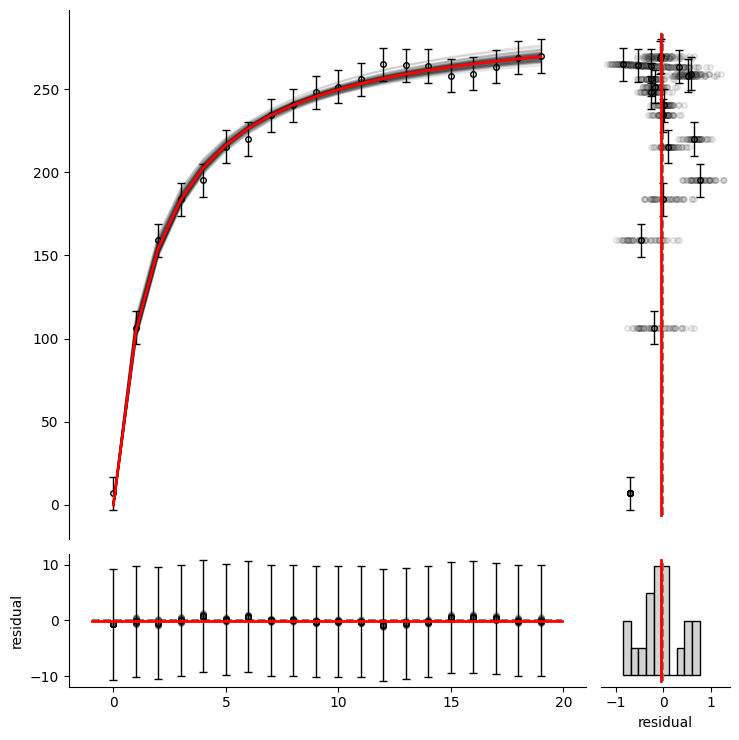

In [6]:
%matplotlib inline
import dataprob
import numpy as np

def michaelis_menten(vmax=100,km=30,s0=None): 
    return s0/(s0 + km)*vmax

gen_params = {"vmax":300,
              "km":10}

err = 5
num_points = 20

s0 = np.linspace(0,100,num_points)
y_obs = michaelis_menten(s0=s0,**gen_params) + np.random.normal(0,err,num_points)
y_std = 2*err

non_fit_kwargs = {"s0":s0}

f = dataprob.setup(some_function=michaelis_menten,
                   method="ml",
                   non_fit_kwargs=non_fit_kwargs)
f.fit(y_obs=y_obs,
      y_std=y_std)

fig = dataprob.plot_summary(f)

f.fit_df